In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

C:\Users\HP\AppData\Local\Temp\ipykernel_27744\2750160196.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv('/content/Dindhori Station_Narmada_updated.csv')

In [ ]:
X = data[['RAINFALL','TEMPERATURE','HUMIDITY']].values
y = data['RIVERFLOW'].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
80/80 - 2s - loss: 0.0021 - 2s/epoch - 24ms/step
Epoch 2/200
80/80 - 0s - loss: 0.0019 - 156ms/epoch - 2ms/step
Epoch 3/200
80/80 - 0s - loss: 0.0020 - 155ms/epoch - 2ms/step
Epoch 4/200
80/80 - 0s - loss: 0.0019 - 151ms/epoch - 2ms/step
Epoch 5/200
80/80 - 0s - loss: 0.0019 - 156ms/epoch - 2ms/step
Epoch 6/200
80/80 - 0s - loss: 0.0020 - 152ms/epoch - 2ms/step
Epoch 7/200
80/80 - 0s - loss: 0.0019 - 151ms/epoch - 2ms/step
Epoch 8/200
80/80 - 0s - loss: 0.0019 - 150ms/epoch - 2ms/step
Epoch 9/200
80/80 - 0s - loss: 0.0019 - 161ms/epoch - 2ms/step
Epoch 10/200
80/80 - 0s - loss: 0.0019 - 159ms/epoch - 2ms/step
Epoch 11/200
80/80 - 0s - loss: 0.0019 - 151ms/epoch - 2ms/step
Epoch 12/200
80/80 - 0s - loss: 0.0019 - 152ms/epoch - 2ms/step
Epoch 13/200
80/80 - 0s - loss: 0.0020 - 148ms/epoch - 2ms/step
Epoch 14/200
80/80 - 0s - loss: 0.0019 - 164ms/epoch - 2ms/step
Epoch 15/200
80/80 - 0s - loss: 0.0019 - 220ms/epoch - 3ms/step
Epoch 16/200
80/80 - 0s - loss: 0.0019 - 211ms/epoc

In [ ]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss on Test:', score)

Loss on Test: 0.004442789126187563


In [ ]:
y_test = scaler.inverse_transform(y_test)

In [ ]:
y_test

array([[3.11553800e+00],
       [6.02343900e+00],
       [8.21355400e+00],
       [2.27740030e+00],
       [7.21000000e+01],
       [3.88400000e-01],
       [9.44400000e+01],
       [4.96782570e+01],
       [4.10838940e+00],
       [7.77468500e+00],
       [8.13566860e-01],
       [1.51500000e+02],
       [1.04800000e+01],
       [2.98300000e+00],
       [3.99432100e+01],
       [5.67975400e+00],
       [5.40161470e+00],
       [1.15117000e+03],
       [8.58803800e+00],
       [9.12400000e+00],
       [6.56700000e+00],
       [4.31383600e+00],
       [1.39600000e+00],
       [7.20183750e+00],
       [5.52267800e+00],
       [7.91200000e+00],
       [1.16400000e+02],
       [2.45500000e+00],
       [9.83409500e+00],
       [6.73535870e+00],
       [5.74741170e+00],
       [7.73428960e+01],
       [7.73400000e+00],
       [4.56000000e-01],
       [5.85680900e+00],
       [2.77800000e+00],
       [1.18654500e+01],
       [1.35595210e+01],
       [6.31317400e+00],
       [2.50330770e+01],


In [ ]:
y_pred

array([[ 5.8343334e+01],
       [ 3.7999611e+00],
       [ 2.4237352e+02],
       [ 2.8694931e+01],
       [ 8.9093941e+01],
       [-1.2698682e+02],
       [ 6.3123810e+01],
       [ 4.8927586e+01],
       [ 9.6890812e+00],
       [ 2.5055918e+01],
       [ 2.2507307e+01],
       [ 1.7931595e+01],
       [ 5.0875153e+01],
       [ 1.2606818e+01],
       [ 5.5966171e+01],
       [ 6.7337422e+00],
       [ 3.4022393e+00],
       [ 1.0039683e+02],
       [ 1.2955721e+02],
       [ 4.1475136e+01],
       [ 6.9352852e+01],
       [ 1.5612269e+01],
       [ 1.7917060e+00],
       [ 1.3206868e+01],
       [ 3.2822111e+00],
       [ 5.6965435e+01],
       [ 9.7427383e+01],
       [ 8.1357737e+00],
       [ 1.0569123e+01],
       [ 2.3705683e+00],
       [ 1.5967293e+01],
       [ 2.2162262e+01],
       [ 4.8563175e+01],
       [ 6.3135624e+00],
       [ 1.1965078e+01],
       [ 5.8000088e+00],
       [ 1.0007065e+01],
       [ 3.6704437e+01],
       [ 1.7964790e+01],
       [ 6.0503811e+01],


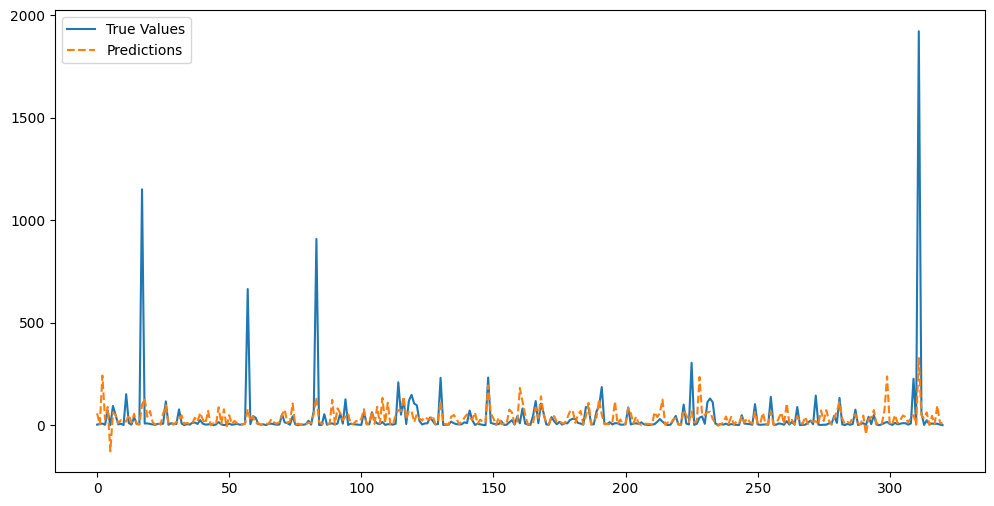

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, linestyle='-', label='True Values')
plt.plot(y_pred, linestyle='--', label='Predictions')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.savefig('result.png', format="png", dpi=2400)
plt.show()

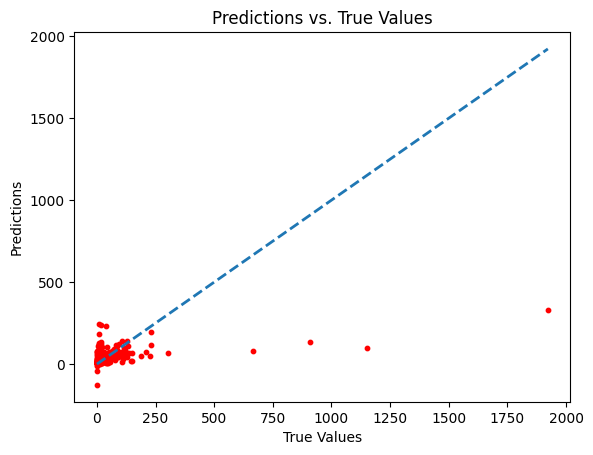

In [ ]:
plt.scatter(y_test, y_pred, s=10, c='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', linewidth=2)
fig.set_size_inches(12, 6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()

In [ ]:
#Accuracy score using R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.20085160724469242
